In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# Calc BMI and create overweight column
# Create new temporary column 'height_meters' by dividing 'height' by 100
df['height_meters'] = df['height'] / 100
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_meters
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.68
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.58
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.83
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.63


In [4]:
# Create new temporary column 'bmi' by dividing 'weight' by 'height_meters' squared
df['bmi'] = df['weight'] / (df['height_meters'] ** 2)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_meters,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.68,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.58,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.83,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.63,27.099251


In [5]:
# Create new column 'overweight' by setting 'bmi' > 25 to 1 and 0 otherwise
df['overweight'] = (df['bmi'] > 25).astype(int)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_meters,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.68,26.927438,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.58,50.472681,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.83,31.353579,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.63,27.099251,1


In [6]:
# Drop the temporary columns used for the overweight calculation
df.drop(['height_meters', 'bmi'], axis=1, inplace=True)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [7]:
# Normalize data by making 0 always good and 1 always bad. If the value of cholesterol is 1, set the value to 0. If the value is more than 1, set the value to 1.
# Access 'cholesterol' column
cholesterol_column = df['cholesterol']
cholesterol_column

0        1
1        3
2        3
3        1
4        1
        ..
69995    1
69996    2
69997    3
69998    1
69999    2
Name: cholesterol, Length: 70000, dtype: int64

In [8]:
# Create boolean mask Series for cholesterol levels >1
cholesterol_mask = cholesterol_column > 1
cholesterol_mask

0        False
1         True
2         True
3        False
4        False
         ...  
69995    False
69996     True
69997     True
69998    False
69999     True
Name: cholesterol, Length: 70000, dtype: bool

In [9]:
# Convert boolean mask Series to integers (1 for True, 0 for False)
# Note: .astype(int) converts True to 1 and False to 0
cholesterol_int = cholesterol_mask.astype(int)
cholesterol_int

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    1
69997    1
69998    0
69999    1
Name: cholesterol, Length: 70000, dtype: int64

In [10]:
# Assign resulting Series back to the 'cholesterol' column in DF
df['cholesterol'] = cholesterol_int
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,2,0,0,0,1,1


In [11]:
# Normalize data by making 0 always good and 1 always bad. If the value of gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
# Same as for cholesterol, using shorthand
df['gluc'] = (df['gluc'] > 1).astype(int)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


### Cat Plot

In [12]:
# Create new DF 'df_cat' using 'pd.melt'.
df_cat = pd.melt(df, 
                 id_vars=['cardio'], 
                 value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
# Reset the index of the DataFrame.
df_cat = df_cat.reset_index()
df_cat

,index,cardio,variable,value
0,0,0,cholesterol,0
1,1,1,cholesterol,1
2,2,1,cholesterol,1
3,3,1,cholesterol,0
4,4,0,cholesterol,0
...,...,...,...,...
419995,419995,0,overweight,1
419996,419996,1,overweight,1
419997,419997,1,overweight,1
419998,419998,1,overweight,1


In [13]:
# Group the data by 'variable', 'cardio', and 'value' columns.
df_cat = df_cat.groupby(['variable', 'cardio', 'value']) \
               .agg('count') \
               .rename({'index': 'total'}, axis=1)
# Reset the index to make 'variable', 'cardio', 'value', and 'total' regular columns.
df_cat = df_cat.reset_index()
df_cat

,variable,cardio,value,total
0,active,0,0,6378
1,active,0,1,28643
2,active,1,0,7361
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,1941
6,alco,1,0,33156
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,5691


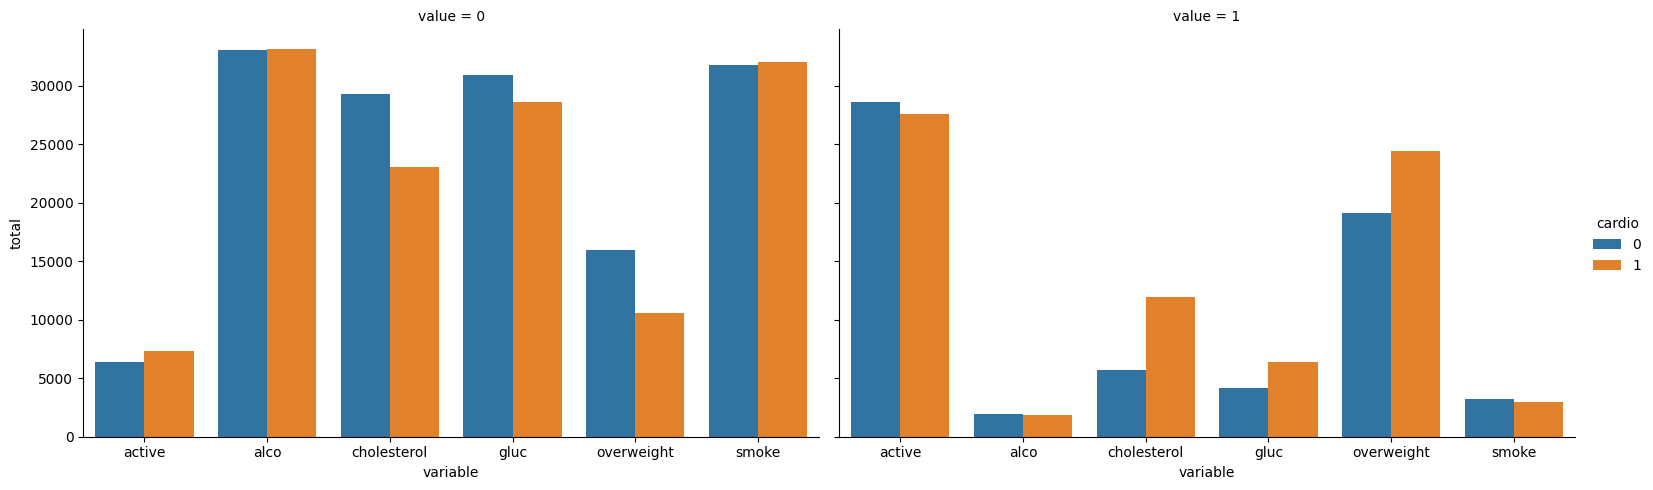

In [14]:
# Create catplot using Seaborn's `catplot` function.
fig = sns.catplot(x='variable', 
                 y='total', 
                 hue='cardio', 
                 col='value', 
                 data=df_cat, 
                 kind='bar', 
                 height=5, 
                 aspect=1.6)

### Heat Map

In [15]:
# Clean the data by filtering out rows based on conditions given in task
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &  # Ensure 'ap_lo' is less than or equal to 'ap_hi'
    (df['height'] >= df['height'].quantile(0.025)) &  # Remove bottom 2.5% of 'height' values
    (df['height'] <= df['height'].quantile(0.975)) &  # Remove top 2.5% of 'height' values
    (df['weight'] >= df['weight'].quantile(0.025)) &  # Remove bottom 2.5% of 'weight' values
    (df['weight'] <= df['weight'].quantile(0.975))    # Remove top 2.5% of 'weight' values
]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [16]:
# Calculate the correlation matrix between all pairs of columns in the cleaned data
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [17]:
# Generate mask for the upper triangle of the correlation matrix to avoid redundant information
# Note: 'triu' stands for 'triangle upper'
mask = np.triu(corr)
mask

array([[ 1.00000000e+00,  2.50729691e-03,  3.42610273e-03,
         3.25916709e-04,  1.49333224e-04,  3.49238023e-03,
         4.83670793e-04,  3.71939143e-03,  2.28909034e-03,
        -2.73227725e-03, -7.08059804e-04,  5.89114223e-03,
         3.90011059e-03, -6.79420314e-04],
       [ 0.00000000e+00,  1.00000000e+00, -1.81320052e-02,
        -7.69318347e-02,  7.01683896e-02,  1.86894095e-02,
         1.53507973e-01,  1.29996176e-01,  8.69901449e-02,
        -4.43706471e-02, -2.69695382e-02, -1.14451266e-02,
         2.40241089e-01,  8.95726547e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         5.05784851e-01,  1.29979320e-01,  5.06250408e-03,
         5.99466484e-02, -3.76050443e-02, -2.13573847e-02,
         3.37435881e-01,  1.68637124e-01,  7.86370242e-03,
         2.31999158e-03, -5.29296848e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  2.51502865e-01,  4.58573625e-03,
         1.79224331e-02, -6.35217890e-02, -3.

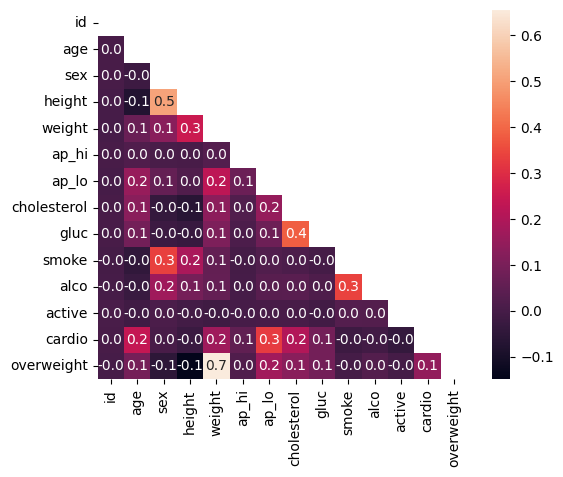

In [18]:
# Draw the heatmap using seaborn's heatmap function
ax = sns.heatmap(
    corr,           # Data to visualize (correlation matrix)
    mask=mask,      # Hide the upper triangle
    annot=True,     # Show correlation values on the heatmap
    fmt='0.1f',     # Format the annotations to one decimal place
    square=True     # Make the heatmap cells square for better visual representation
)